In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

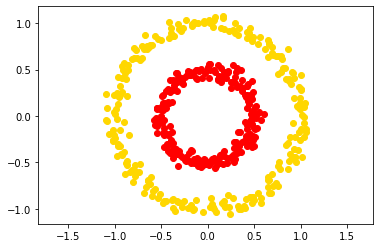

In [43]:
# crear el dataset 
n = 500
p = 2
X, Y = make_circles(n_samples = n, factor = .5, noise = 0.05)
Y = Y[:, np.newaxis]
plt.scatter(X[Y[:, 0]== 0, 0], X[Y[:, 0]== 0, 1], c= "gold")
plt.scatter(X[Y[:, 0]== 1, 0], X[Y[:, 0]== 1, 1], c = "red")
plt.axis("equal")
plt.show()

In [13]:
# Clase de la capa de la red
class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):
    self.act_f = act_f
    self.b = np.random.rand(1, n_neur) * 2 - 1
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1


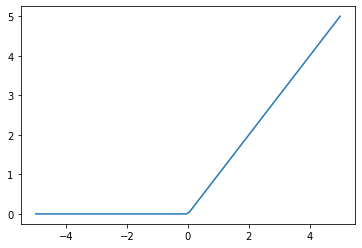

In [45]:
#funciones de activacion 

sigm = (lambda x : 1 / (1+ np.e ** (-x)),
        lambda x : x * (1 - x))
relu = lambda x: np.maximum(0, x)
_x = np.linspace (-5, 5, 100)
plt.plot(_x, relu(_x))
                    

In [46]:

def create_nn(topology, act_f):
  nn = []
  for l, layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[l], topology[l+1], act_f))
  return nn




In [56]:
topology = [p, 4, 8, 1]
neural_net = create_nn(topology, sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))
          

def train(neural_net, X, Y, l2_cost, lr = 0.5, train = True):
  #forward pass
  out = [(None, X)]

  for l, layer in enumerate(neural_net):

    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].act_f[0](z)

    out.append((z, a))
 
  print(l2_cost[0](out[-1][1], Y))
  
  if train:
    #backward pass

    deltas = []
    for l in reversed(range(0, len(neural_net))):
      z = out[l+1][0]
      a = out[l+1][1]

      if l == len(neural_net) - 1:
        #calcular delta ult capa
        deltas.insert(0, l2_cost[1](a, Y)* neural_net[l].act_f[1](a))
      else:
        #calcular delta respecto a capa anterior
        
        deltas.insert(0,deltas[0] @ _W.T * neural_net[l].act_f[1](a))
      _W =  neural_net[l].W

        


    #gradient descent
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True)*lr
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr 

  return out[-1][1]



  
train(neural_net, X, Y, l2_cost, 0.5)
print("")



  

0.32056289054056525



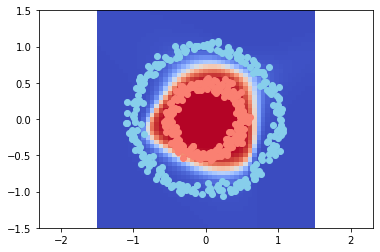

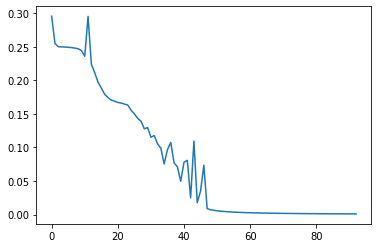

0.0009867698588544474
0.000985957199778733
0.000985145826633864
0.0009843357364085303
0.0009835269261007354
0.0009827193927177665
0.0009819131332761515
0.0009811081448016254
0.0009803044243290994
0.0009795019689026205
0.0009787007755753397
0.0009779008414094756
0.0009771021634762797
0.0009763047388560022
0.0009755085646378599
0.0009747136379199986
0.0009739199558094627
0.0009731275154221537
0.0009723363138828076
0.0009715463483249551
0.0009707576158908858
0.0009699701137316192
0.000969183839006873
0.0009683987888850238
0.0009676149605430805
0.4986956649859279
0.4986673229511244
0.49863851302225554
0.49860904188713573
0.49857867367933567
0.49854712377644955
0.49851405114765157
0.4984790488940214
0.4984416325646524
0.4984012257634972
0.4983571424921936
0.4983085656162869
0.4982545208236442
0.49819384551602175
0.49812515233118654
0.49804678759751625
0.49795678625435774
0.4978528270884036
0.49773219626365767
0.49759177413978845
0.49742807174374754
0.4972373606301984
0.4970159642794053
0.49

In [ ]:
import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range (2500):
  pY = train(neural_n, X, Y, l2_cost, lr = .05)

  if i % 25 == 0:
    loss.append(l2_cost[0](pY, Y))
    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)
    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:, 0] == 1, 1], c= "salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)